A Stationary series is one whose statistical properties such as mean, variance, covariance, and standard deviation do not vary with time, or these stats properties are not a function of time. In other words, stationarity in Time Series also means series without a **Trend** or **Seasonal** components.

* Constant mean
* Constant Variance
* Constant covariance

Visual Signs of Non-Stationarity

* Trend: A clear upward or downward movement over time. The mean is not constant.
* Seasonality: A pattern that repeats at regular intervals(e.g., yearly, monthly, weekly).
* Varying Variance: The spread of the data points increases or decreases over time, making the series wider or narrower

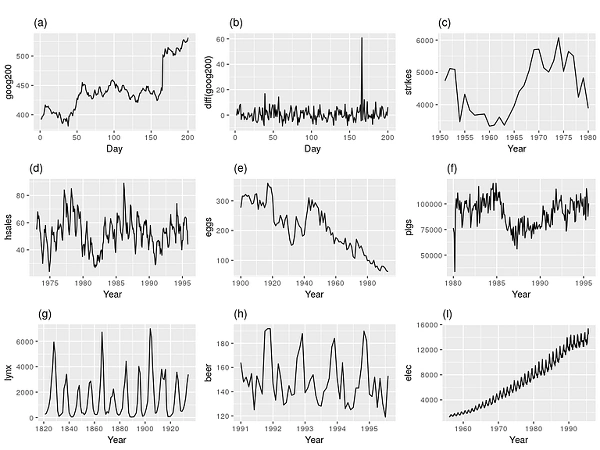

* Seasonality can be observed in series (d), (h), and (i)
* The trend can be observed in series (a), (c), (e), (f), and (i)
* Series (b) and (g) are stationary

ADF Test:
* Null Hypothesis (HO): Series is non-stationary
* Alternate Hypothesis (HA): Series is stationary

Reject the null hypothesis if p-value < 0.05

KPSS Test
* Null Hypothesis (HO): Series is trend stationary
* Alternate Hypothesis (HA): Series is non-stationary

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here `sparse_dates` converts the Month column into date time format and `index_col` makes the Month column an index. This is the most important step in time series analysis.

In [5]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'],index_col='Month')
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

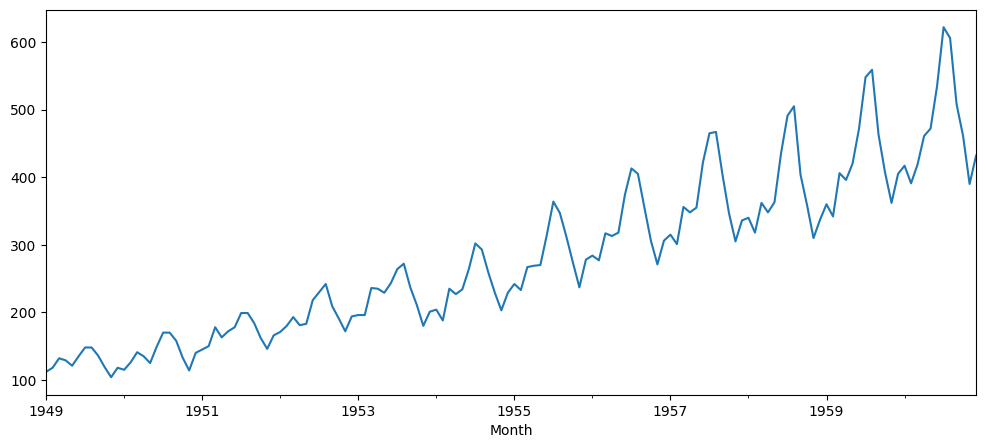

In [ ]:
df["Passengers"].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
dftest = adfuller(df["Passengers"], autolag='AIC')

In [ ]:
dfoutput = pd.Series(dftest[0:4], index=['Test statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
dfoutput

,0
Test statistic,0.815369
p-value,0.991880
#Lags Used,13.000000
Number of Observations Used,130.000000
Critical Value (1%),-3.481682
Critical Value (5%),-2.884042
Critical Value (10%),-2.578770


In [1]:
from statsmodels.tsa.stattools import kpss

In [6]:
kpsstest = kpss(df["Passengers"], regression = 'c', nlags = 'auto')

/tmp/ipython-input-1663253901.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(df["Passengers"], regression = 'c', nlags = 'auto')


In [7]:
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', '#Lags Used'])
for key, value in kpsstest[3].items():
  kpss_output['Critical Value (%s)' %key] = value
kpss_output

,0
Test Statistic,1.651312
p-value,0.010000
#Lags Used,8.000000
Critical Value (10%),0.347000
Critical Value (5%),0.463000
Critical Value (2.5%),0.574000
Critical Value (1%),0.739000


In [8]:
def kpss_test(timeseries):
  print('Results of KPSS Test:')
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', '#Lags Used'])
  for key, value in kpsstest[3].items():
    kpss_output['Critical Value (%s)' %key] = value
  print(kpss_output)

The following are the possible outcomes of applying both tests.

- Case 1: Both tests conclude that the given series is stationary – The series is stationary
- Case 2: Both tests conclude that the given series is non-stationary The series is non-stationary
- Case 3: ADF concludes non-stationary, and KPSS concludes stationary  The series is trend stationary. To make the series strictly stationary, we need to remove the trend in this case. Then we check the detrended series for stationarity.
- Case 4: ADF concludes stationary, and KPSS concludes non-stationary  The series is difference stationary. Differencing is to be used to make series stationary. Then we check the differenced series for stationarity.

Before applying any model to the time series data we first have to make it stationary. Some of the methods are:
* Differencing
* Log transformation
* Seasonal differencing

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.linear_model import LinearRegression

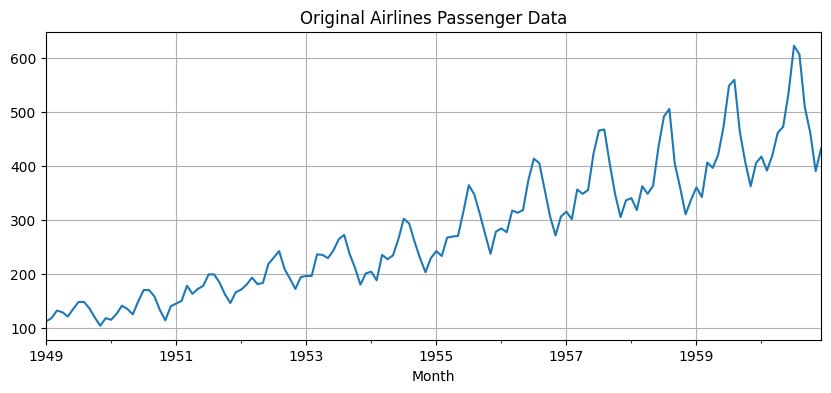

In [10]:
# Plot the original series
df['Passengers'].plot(title = 'Original Airlines Passenger Data', figsize=(10,4))
plt.grid()
plt.show()

In [12]:
# Step 1: Fit linear regression (trend) using sklearn
X = np.arange(len(df)).reshape(-1,1)          # Time as feature
y = df['Passengers'].values                   # Passenger values
model = LinearRegression().fit(X,y)
trend = model.predict(X)

In [13]:
df['detrended'] = y-model.predict(X)

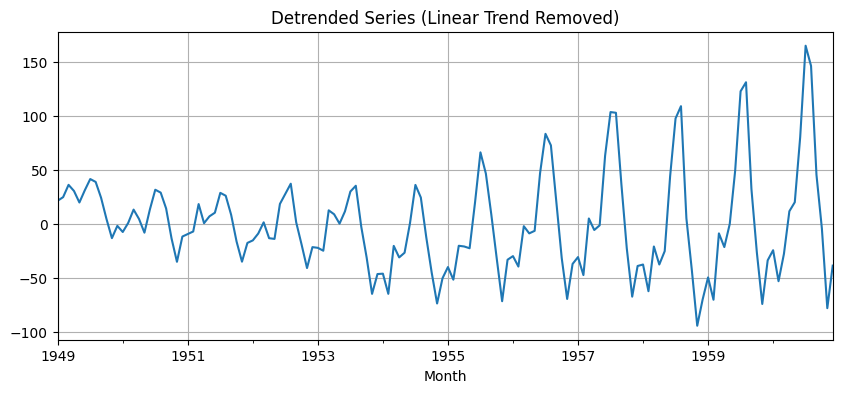

In [14]:
# Plot detrended series
df['detrended'].plot(title = 'Detrended Series (Linear Trend Removed)', figsize=(10,4))
plt.grid()
plt.show()

In [15]:
# Step 2: Stationarity Test
# ADF Test
adf_orig_p = adfuller(df['Passengers'])[1]
adf_det_p = adfuller(df['detrended'])[1]

#KPSS Test
kpss_orig_p = kpss(df['Passengers'], regression = 'ct')[1]    # trend + constant
kpss_det_p = kpss(df['detrended'], regression = 'c')[1]      # constant only

# Step 3: Print Results
print("📊 Stationarity Test Results")
print(f"ADF (Original):     p = {adf_orig_p:.4f} → {'Non-stationary' if adf_orig_p > 0.05 else 'Stationary'}")
print(f"KPSS (Original):    p = {kpss_orig_p:.4f} → {'Non-stationary' if kpss_orig_p < 0.05 else 'Stationary'}")
print(f"ADF (Detrended):    p = {adf_det_p:.4f} → {'Non-stationary' if adf_det_p > 0.05 else 'Stationary'}")
print(f"KPSS (Detrended):   p = {kpss_det_p:.4f} → {'Non-stationary' if kpss_det_p < 0.05 else 'Stationary'}")


📊 Stationarity Test Results
ADF (Original):     p = 0.9919 → Non-stationary
KPSS (Original):    p = 0.1000 → Stationary
ADF (Detrended):    p = 0.2437 → Non-stationary
KPSS (Detrended):   p = 0.1000 → Stationary


/tmp/ipython-input-2100008492.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_orig_p = kpss(df['Passengers'], regression = 'ct')[1]    # trend + constant
/tmp/ipython-input-2100008492.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_det_p = kpss(df['detrended'], regression = 'c')[1]      # constant only


In this notebook what I have done is:

1.   I loaded the airline passenger data then convert the month column into datetime format and then make it index also.
2.   Applied ADF and KPSS test to check whether time series data is stationary or not.
3. Found Trend in the data so used regression model to detrend it, did detrend by fitting the model and then predicted with the X, and then that predicted values has been subtracted from  actual value that would give detrend value.
4. Then applied ADF and KPSS test again to check stationary or not.
5. Found stationary.
